# 시각화 도구

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\rladl\\Jupyter.study\\05000266\\part4\\시도별 전출입 인구수.xlsx',engine='openpyxl',header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [12]:
# 누락값을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask =(df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [14]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

## 선 그래프

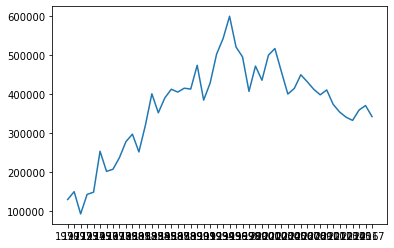

In [15]:
plt.plot(sr_one.index, sr_one.values)

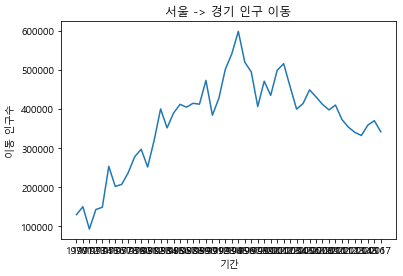

In [20]:
from matplotlib import font_manager, rc
font_path = "C:\\Users\\rladl\\Jupyter.study\\05000266\\part4\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

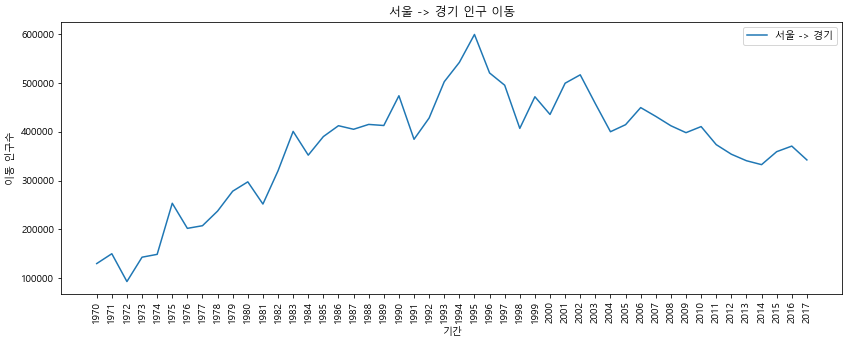

In [21]:
# 그림 사이즈 지정 (가로 14인치 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기 (시계 반대방향)
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'],loc='best') # 범례 표시
plt.show() # 변경사항 저장하고 그래프 출력

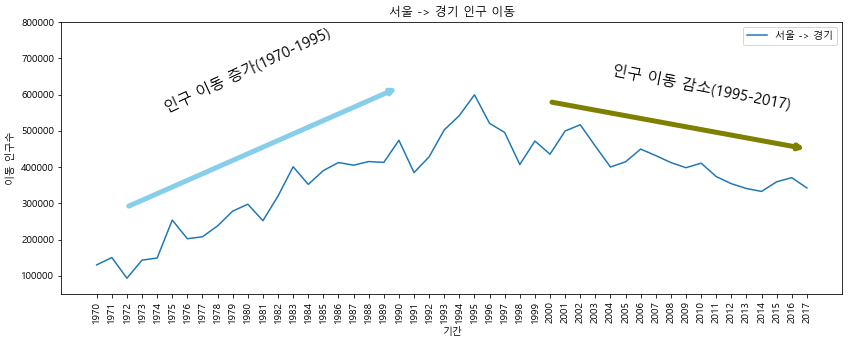

In [27]:
# 그림 사이즈 지정 (가로 14인치 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기 (시계 반대방향)
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'],loc='best') # 범례 표시

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시
plt.annotate('', 
            xy=(20,620000),
            xytext=(2,290000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),)
plt.annotate('', 
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='olive', lw=5),)
plt.annotate('인구 이동 증가(1970-1995)',
            xy=(10,550000),
            rotation=25,
            va='baseline',
            ha='center',
            fontsize=15,)
plt.annotate('인구 이동 감소(1995-2017)',
            xy=(40,560000),
            rotation=-11,
            va='baseline',
            ha='center',
            fontsize=15,)
plt.show() # 변경사항 저장하고 그래프 출력

C:\Users\rladl\AppData\Local\Temp/ipykernel_17108/704395541.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\rladl\AppData\Local\Temp/ipykernel_17108/704395541.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


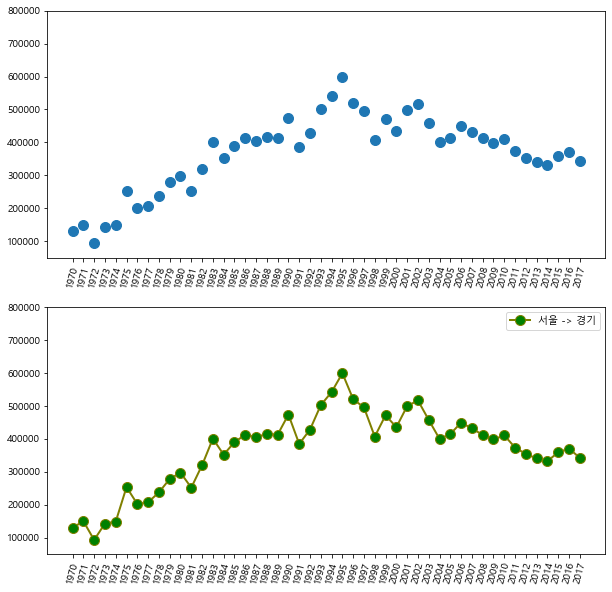

In [28]:
# 그래프 객체 생성
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one,'o', markersize=10)
ax2.plot(sr_one,marker='o', markerfacecolor='green',markersize=10, color='olive',linewidth=2,label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)
plt.show()

## 같은 화면에 그래프 추가

C:\Users\rladl\AppData\Local\Temp/ipykernel_17108/1635716007.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


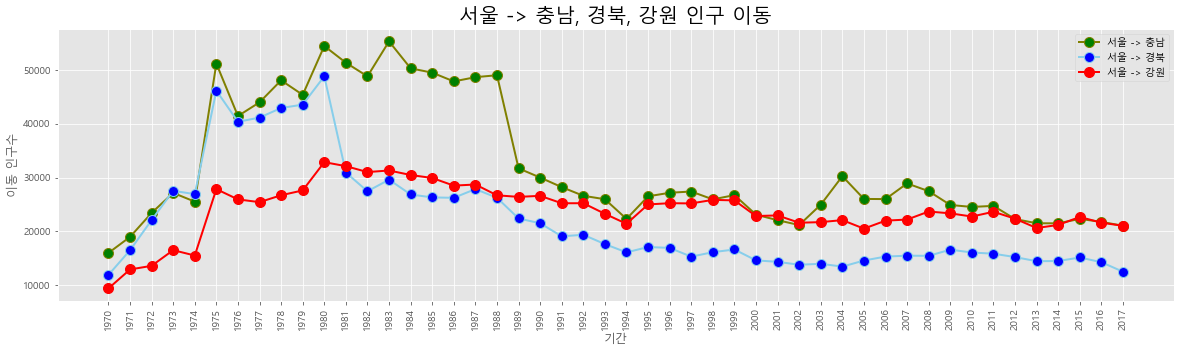

In [31]:
col_years = list(map(str, range(1970,2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도','강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', 
        markerfacecolor='green',markersize=10, color='olive', linewidth=2,label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', 
        markerfacecolor='blue',markersize=10, color='skyblue', linewidth=2,label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', 
        markerfacecolor='red',markersize=10, color='red', linewidth=2,label='서울 -> 강원')

ax.legend(loc='best')

#차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size= 20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

## 면적 그래프

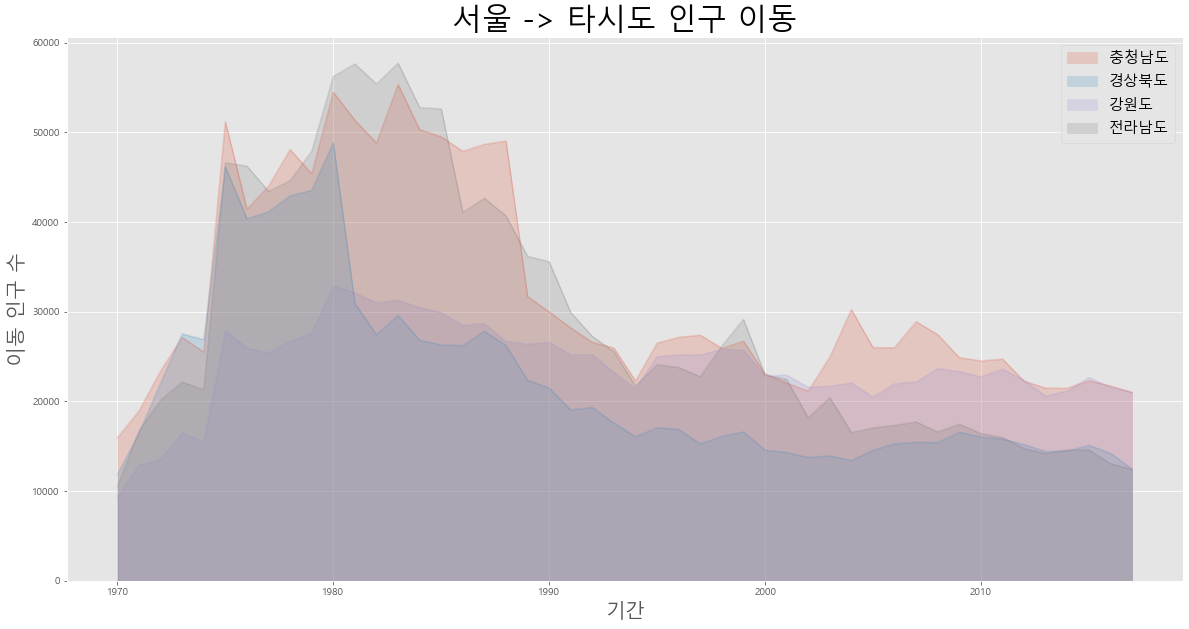

In [39]:
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

# 데이터프레임의 인덱스를 정수형으로 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

## 막대 그래프

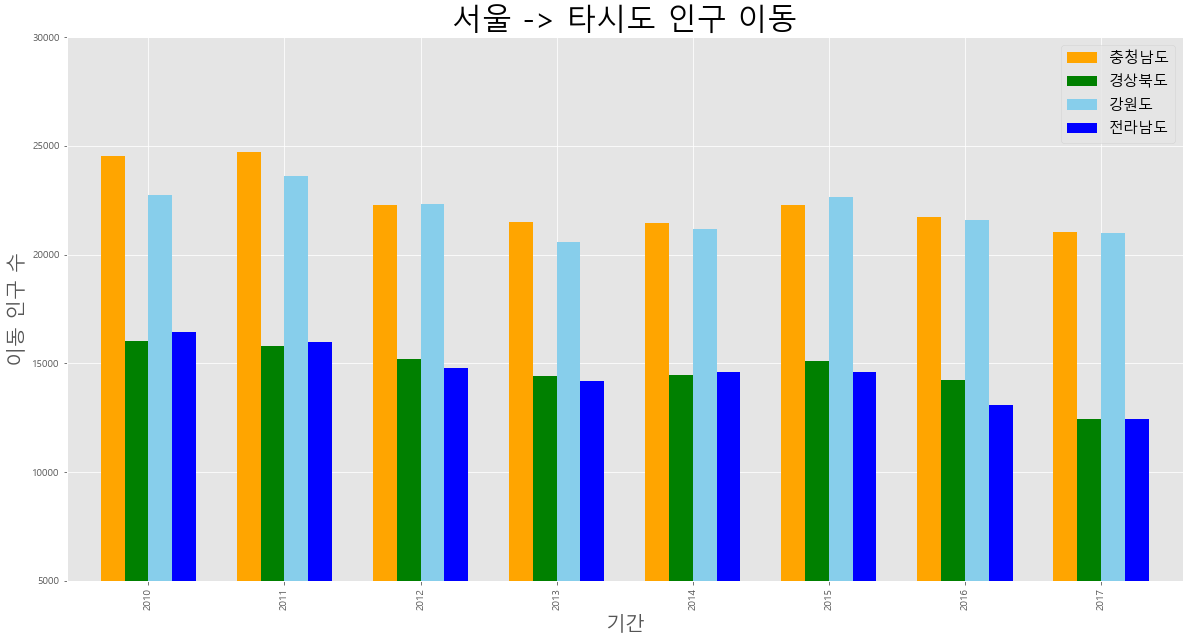

In [40]:
col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()
df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size =20)
plt.xlabel('기간', size=20)
plt.ylim(5000,30000)
plt.legend(loc='best', fontsize=15)

plt.show()

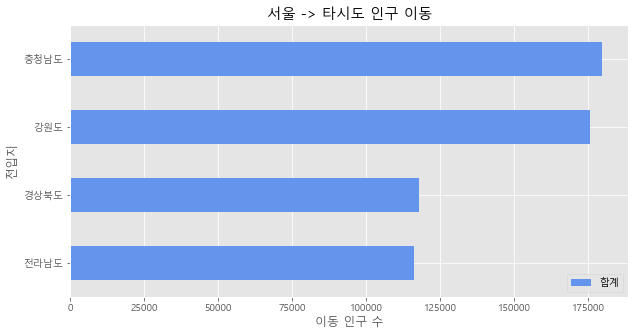

In [54]:
col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4['합계'] = df_4.sum(axis=1)

# 2010-2017년 이동 인구 수를 합계하여 새로운 열을 추가
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

df_total.plot(kind='barh', color = 'cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

---
## 히스토그램 : 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다.

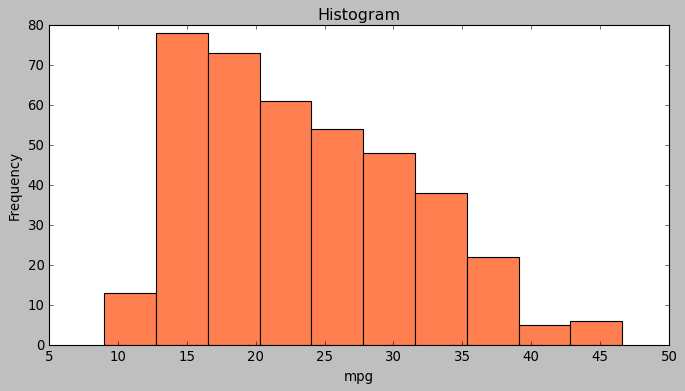

In [55]:
plt.style.use('classic')
df = pd.read_csv('C:\\Users\\rladl\\Jupyter.study\\05000266\\part4\\auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

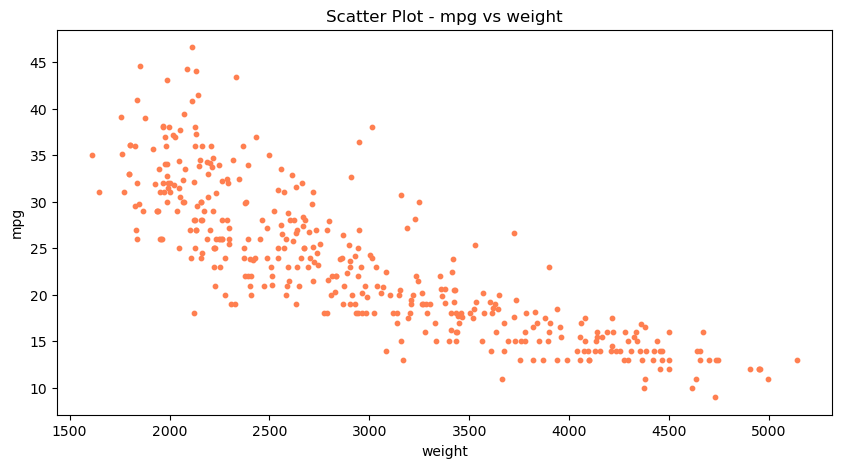

In [56]:
plt.style.use('default')

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

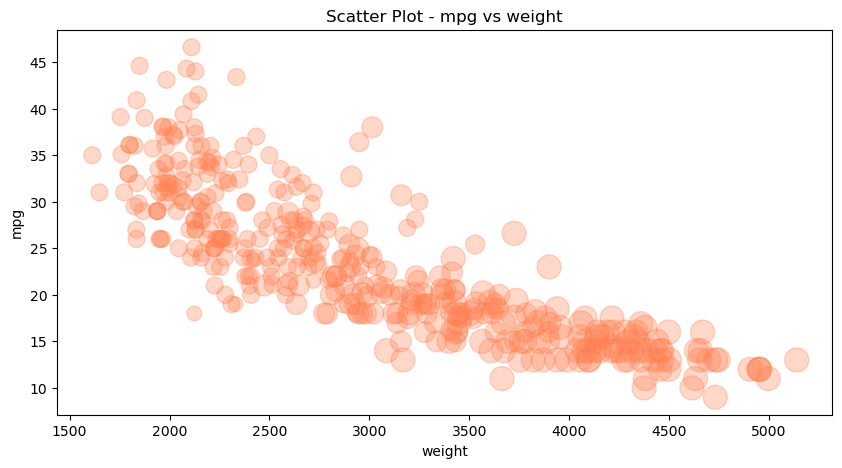

In [59]:
cylinders_size = df.cylinders/df.cylinders.max() *300

df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10,5),
       s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot - mpg vs weight')
plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


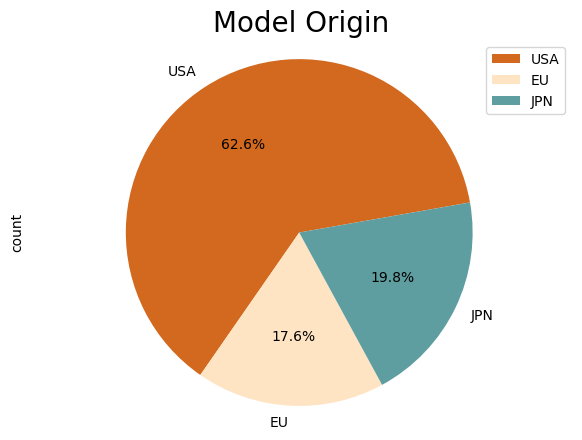

In [68]:
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

df_origin.index = ['USA','EU','JPN']

df_origin['count'].plot(kind='pie',figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['chocolate','bisque','cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc = 'upper right')
plt.show()

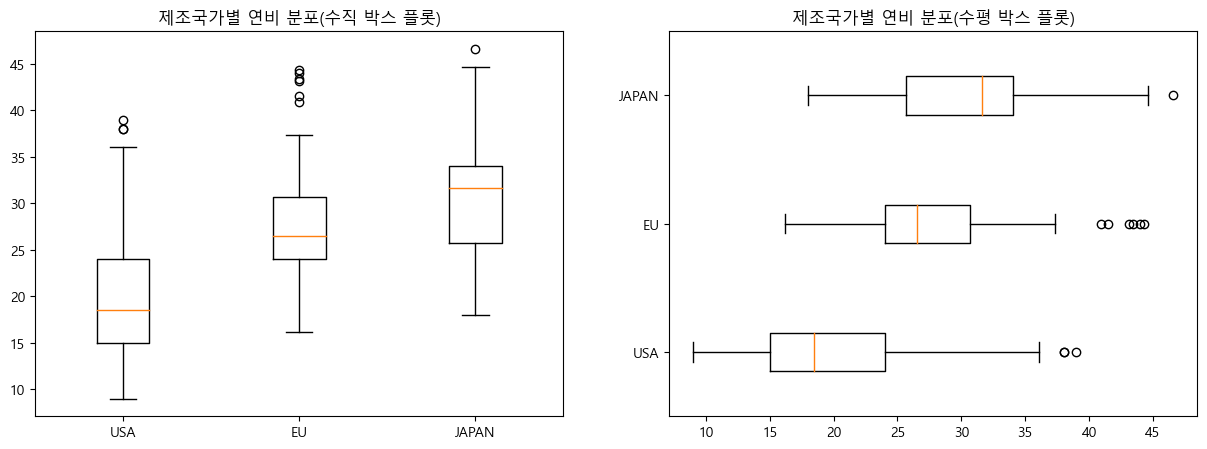

In [70]:
font_path = "C:\\Users\\rladl\\Jupyter.study\\05000266\\part4\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
                df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], labels=['USA','EU','JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
                df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], labels=['USA','EU','JAPAN'], vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')
plt.show()

---
# Seaborn 라이브러리 - 고급 그래프 도구

In [71]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

## 회귀선이 있는 산점도

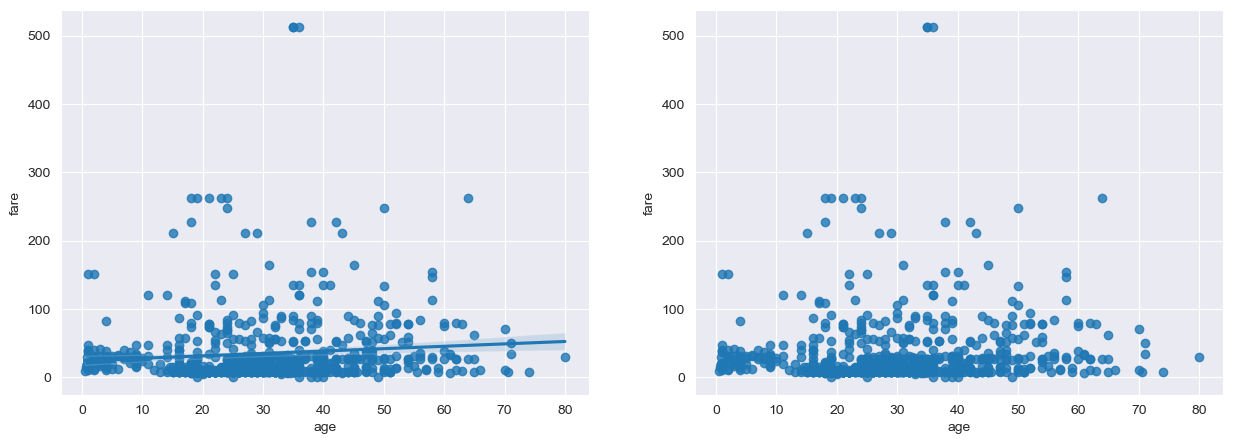

In [72]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)

plt.show()

# 범주형 데이터 ( heatmap(),  stripplot(), swarmplot() )

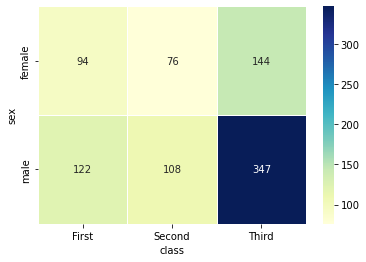

In [3]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
import matplotlib.pyplot as plt

# 피벗 테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')

sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5,cbar=True)
plt.show()

C:\Users\rladl\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


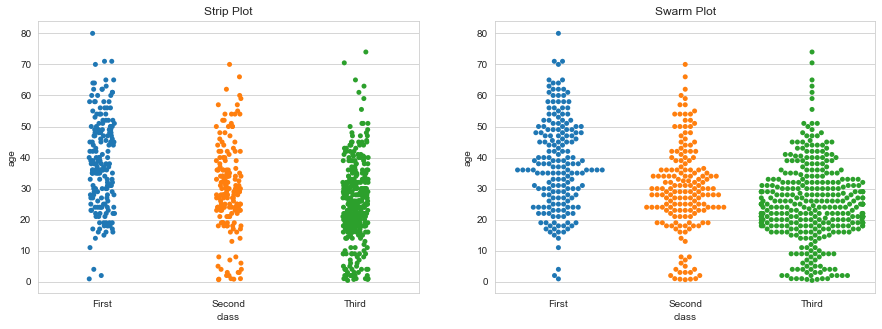

In [4]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1)
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

## 막대 그래프

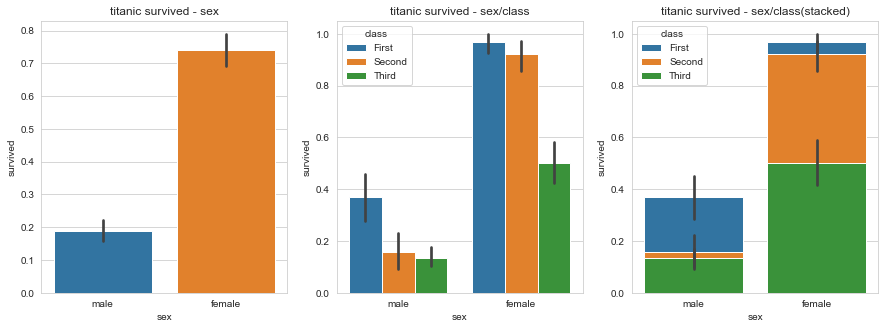

In [5]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

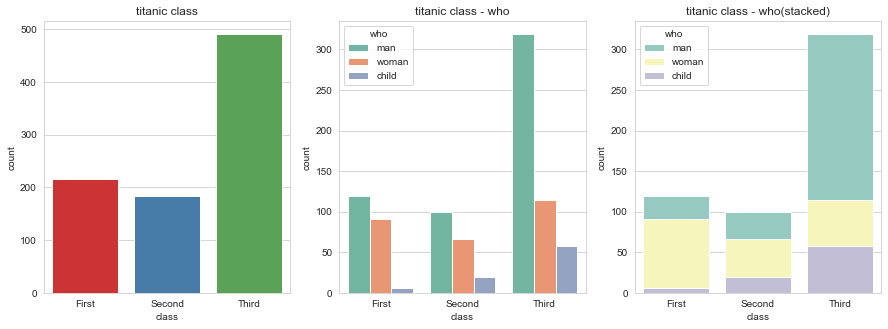

In [9]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who',palette='Set2', data=titanic, ax=ax2)
sns.countplot(x='class', hue='who',palette='Set3',dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')
plt.show()

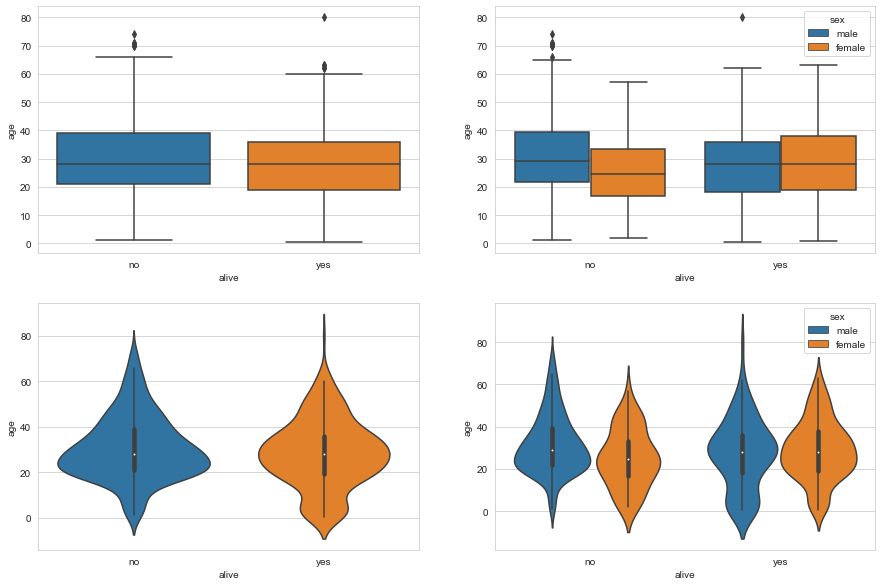

In [10]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex',data=titanic, ax=ax4)
plt.show()

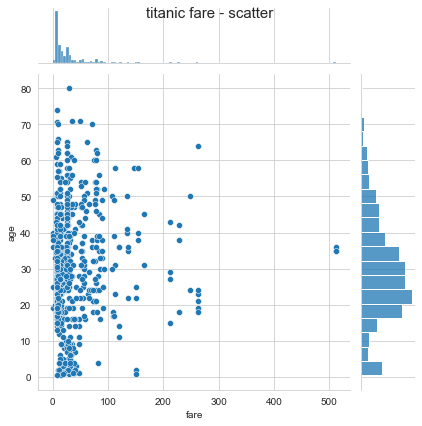

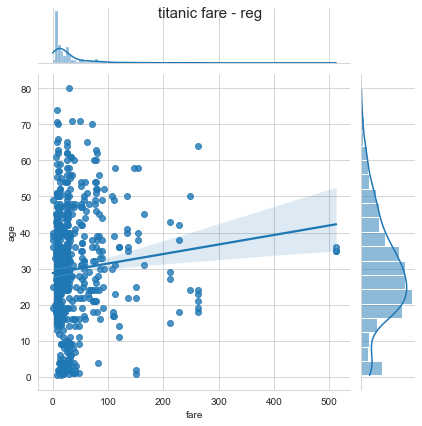

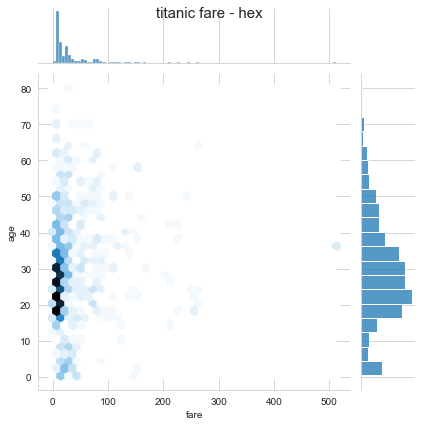

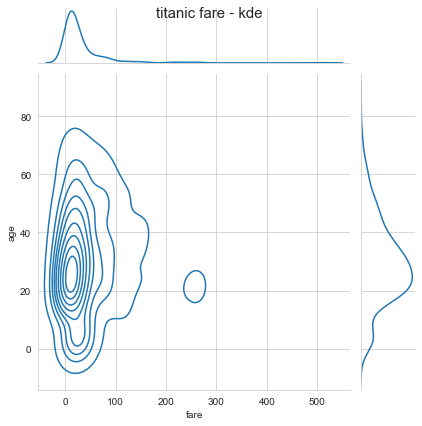

In [13]:
sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
j3 = sns.jointplot(x='fare', y='age', kind='hex',data=titanic)
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

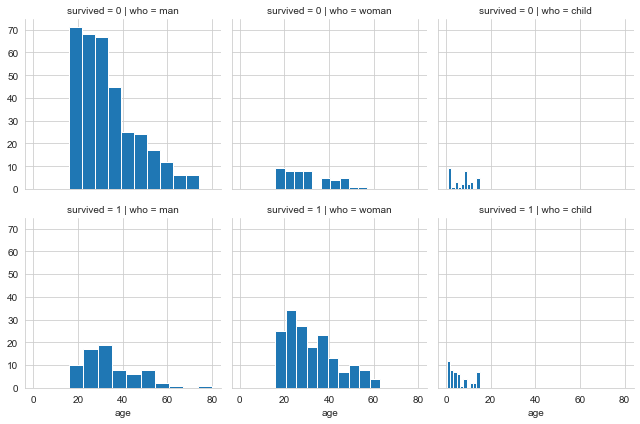

In [14]:
g = sns.FacetGrid(data=titanic, col='who', row='survived')
g = g.map(plt.hist, 'age')

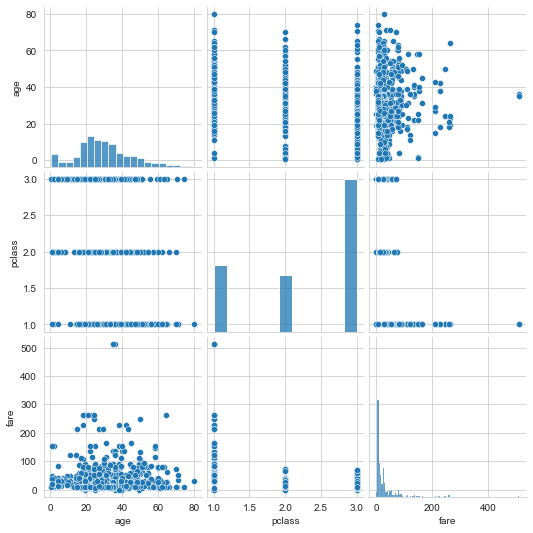

In [15]:
titanic_pair = titanic[['age','pclass','fare']]
g = sns.pairplot(titanic_pair)